# Chapter 6 - Core machine learning concepts; building text vocabularies
2023 April 21

<a target="_blank" href="https://colab.research.google.com/github/EastBayEv/SSDS-TAML/blob/main/spring2023/6_Core_concepts_vocabularies.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

![ml](img/ml.png)

[towardsdatascience.com](https://towardsdatascience.com/artificial-intelligence-vs-machine-learning-vs-deep-learning-2210ba8cc4ac) 

[Click this text to see the Wiki Timeline of Machine Learning](https://en.wikipedia.org/wiki/Timeline_of_machine_learning)

In [1]:
# !pip install sklearn

The sklearn documentation is superb. Try out the examples on your own after this lesson!
* scikit-learn tutorials: https://scikit-learn.org/stable/tutorial/index.html
* scikit-learn user guide: https://scikit-learn.org/stable/user_guide.html 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
import scipy.sparse

/Users/evanmuzzall/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## What is machine learning?

Machine learning is a toolbox for modeling, investigating, and understanding data. 

## Key terms

* **Artificial intelligence:** "A program that can sense, reason, act, and adapt."
* **Machine learning:** "Algorithims whose performance improve as they are exposed to more data over time."
* **Neural network:** A type of algorithm modeled after the human brain, consisting of multiple layers of nodes/neurons.
* **Deep learning:** "Subset of machine learning in which multilayered neural networks learn from vast amounts of data." 

## _x_ and _y_ variables

* **_x_** variables are the independent variables. You will also see these referred to in a variety of contexts as features, covariates, predictors, input, or explanatory variables. 

* The **_y_** variable is the dependent variable. This is also referred to as the response, outcome, and target variable. 

## Types of machine learning:

* **Supervised machine learning:** algorithms train models that (best) learn the relationships between the **_x_** and **_y_** variables on a labeled dataset (called the **training set**, where the ground truth **_y_** variable is known). The performance of the trained model is then evaluated after it predicts the outcome on new data that the model has never seen before (called the **test set**) where where ground truth **_y_** label is unknown. 

The equation looks like:  $y=f(x)+ϵ$
* $f$ is the unknown function that relates **_x_** to **_y_** and is estimated
* $ϵ$ is random error independent of x and averages to zero

> Supervised machine learning TL;DR - we use the x variables to predict the y variable.

* **Unsupervised machine learning:** algorithms are used to sort unlabeled datasets, without attempting to predict anything. 

    * The equation could simply look like: $\sim\ x$
    * Algorithms include: 
        * Clustering: hierarchical agglomerative, k-means, centroid, density-based, DBSCAN, GLRM  
        * Dimension reduction: PCA, t-SNE, UMAP
* **Reinforcement:** algorithims are used to make real-time decisions and skill acquisition in fields such as game-theory and robotics. 
* **Other:** semi-supervised, targeted, etc.

## Data splitting: Training and test performance

Preparation for supervised methods requires a split of the dataset into training and test sets. 

* **Training set:** is comprised of the data that will be used by the model to learn the relationships between the **_x_** and **_y_** variables. This "usually" consists of a majority portion of the rows in the dataset, such as 70%. 

* **Test set:** consists of the holdout data that the trained model has not yet seen and where the trained model will try predict the unknown labels. This "usually" consists of the remaining 30% of rows. 

> NOTE: These values are somewhat arbitrary. It could be argued that the more training data that are available, the "better" your model might be. Conversely, more test data could lead to higher performance on the test data. 

> Furthermore, if you have millions of rows of data, a splits of 50:50 or 99:1 might also work fine depending on the context. 

* **Performance** is generally assessed through cost or loss functions such as misclassification error, sensitivity/specificity, precision/recall, (root) mean squared error, R-squared, AIC, BIC, and other [confusion matrix derivations](https://en.wikipedia.org/wiki/Confusion_matrix). 

* **Cross-validation** is the best way to split your data, because it repeats the train/test data splitting process $k$ number of times and rotates the test set each time so that every observation is included in a test set at least once. Performance results are then averaged to compute predictive performance. 

![cv_wiki](img/cv_wiki.png)

## Model evaluation

How do we know if a model performs well?

![bv](img/bv.png)

* **Underfit:** A model is underfit if it performs poorly on the training data because it could not discern the relationship(s) between the **_x_** and **_y_** variables.
* **Overfit:** A model is overfit if it performs well on the training dataset but poorly on the test set. 
* **Bias/variance tradeoff:** 
    * **Bias** refers to the systematic error due to incorrect assumptions about the machine learning process or the framing of the problem itself. High bias models generally underfit and/or contain large amounts of error. 
    * **Variance** refers to changes in the model predictive accuracy due to fluctuations in the training set or when using different training datasets, and how much the model can adjust to each. High variance could be due to model complexity, noise in the dataset, and overfitting. 
    * The **tradeoff** means that models with high bias will have low variance, and vice-versa. The goal is to find the optimal combination of these two factors for your problem. 

## Classification versus regression

* **Supervised classification:** models probability that **_y_** is 1 given the covariates **_x_** and is performed when **_y_** is categorical (either binary yes/no or multinomial): $Pr(y=1|x)$ 
    * Medical diagnosis
    * Image classification
    * Fraud detection
    * Sentiment analysis

* **Supervised regression:** models the conditional mean probability $E(y|x)$ and is performed when **_y_** is continuous (i.e., integer or float).
    * Life expectancy
    * Population growth
    * Weather forecasting
    * Stock market prediction

* **Supervised algorithms** include: 
    * Regressions: ordinary least squares, generalized linear model, lasso
    * Tree-based methods: decision tree, random forest, boosted trees
    * Kernel-based methods: various; transform non-linear to linear space
* **Unsupervised algorithms** include: 
    * Clustering methods, dimension reduction methods, ordination techniques, PCA, tSNE, UMAP, etc.

View scikit-learn's interactive documentation for estimator (algorithm) selection: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

![skest](img/skest.png)

## Bias in research

Computationally focused, data-centric research is frought with biases. The below figure illustrates several in the process. 

![citation unknown](img/bias_res.png)

## Ethical considerations

Begin to familiarize yourself with the many ethnical points to consider along with their real-world implications:
    
* [Howard et al, 2017. Addressing bias in machine learning algorithms: A pilot study on emotion recognition for intelligent systems](https://ieeexplore.ieee.org/abstract/document/8025197?casa_token=xyJcglvpeyUAAAAA:_tpPmFLycMFQuTd4UC52Y2C5yxXignXv7OE1rgv01YwzOs2o9j_bMvIQPwD8IW2NT5awRJcl4g)
* [Noble, 2018. Algorithms of oppression: How search engines reinforce racism](https://nyupress.org/9781479837243/algorithms-of-oppression/)
* [Yapo and Weiss, 2018. Ethical implications of bias in machine learning](https://aisel.aisnet.org/hicss-51/os/topics_in_os/6/)
* [Mehrabi et al, 2021. A survey on bias and fairness in machine learning](https://dl.acm.org/doi/abs/10.1145/3457607?casa_token=HkkFHCUfRh0AAAAA%3Az5PprDD4p2VDEyZD7KeJzl67tlpTTA48RsIlqcqDYLROEfyJMTzHRjdYYN8SheqDRkvt_H1XXojANQ)

## OLS example - by "hand"

Ordinary least squares regression provides a great example of the machine learning process and some of the key terms defined above. 

### Generate toy data

In [3]:
import pandas as pd
data = pd.DataFrame({"x": [1,2,3,4,5],
                     "y": [2,4,6,8,20]})
data

,x,y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,20


### Calculate means of x and y

In [4]:
x_mean = round(sum(data.x) / len(data.x), 2)
y_mean = round(sum(data.y) / len(data.y), 2)
print("mean of x:", x_mean)
print("mean of y:", y_mean)

mean of x: 3.0
mean of y: 8.0


### Visualize the data (training data)

Plot the known relationships between x and y. 

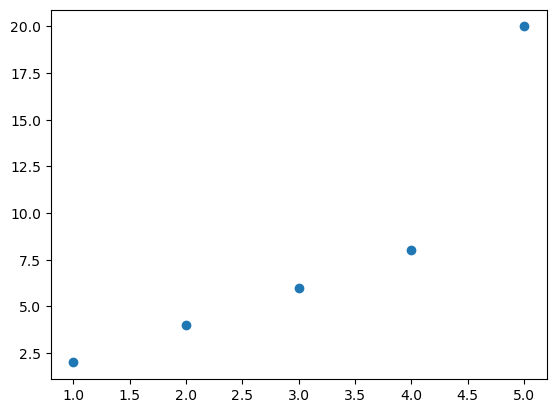

In [5]:
plt.scatter(data.x, data.y);

### Calculate error for each observation

Error (least squares method) is the difference between each observation and the mean. Below this will be represented visually by the distance between each point and the line of best fit. 

In [6]:
x_error = data.x - x_mean
y_error = data.y - y_mean

In [7]:
# x
print(data.x)
print(x_mean)
print(x_error)

0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64
3.0
0   -2.0
1   -1.0
2    0.0
3    1.0
4    2.0
Name: x, dtype: float64


In [8]:
# y
print(data.y)
print(y_mean)
print(y_error)

0     2
1     4
2     6
3     8
4    20
Name: y, dtype: int64
8.0
0    -6.0
1    -4.0
2    -2.0
3     0.0
4    12.0
Name: y, dtype: float64


### Compute beta coefficients

Beta coefficients are used to measure the amount of change in the y variable for a one-unit change in an x variable. 

In [9]:
## Estimate the B1 coefficient (slope)
B1 = sum((data.x - x_mean) * (data.y - y_mean)) / sum((data.x - x_mean) **2)
print("slope (B1) is: ", B1)

## Estimate B0 coefficient (intercept)
B0 = y_mean - (B1 * x_mean)
print("intercept (B0) is: ", B0)

slope (B1) is:  4.0
intercept (B0) is:  -4.0


### Plot best fit line

The best fit line is used to illustrate the minimum distance from the actual versus the predicted values.

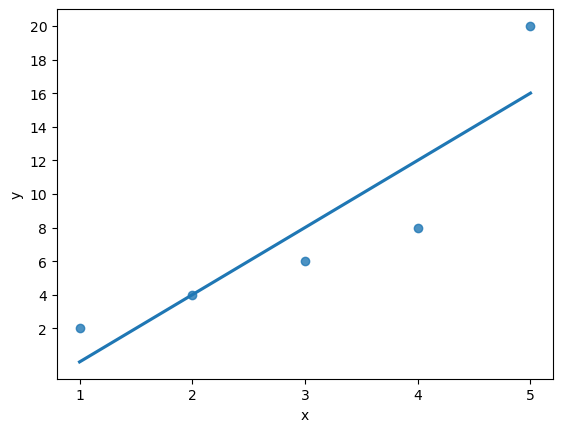

In [10]:
import seaborn as sns
import numpy as np
sns.regplot(data = data, 
            x = "x", y = "y",
           ci = None)
plt.xticks(np.arange(min(data.x), max(data.x)+1, 1.0))
plt.yticks(np.arange(min(data.y), max(data.y)+1, 2.0));

### Generate the predictions (test set)

In [11]:
y_hat = B0 + B1 * data.x
print("Ground truth y values:")
print(data.y)
print()
print("Predicted y values:")
print(y_hat)

Ground truth y values:
0     2
1     4
2     6
3     8
4    20
Name: y, dtype: int64

Predicted y values:
0     0.0
1     4.0
2     8.0
3    12.0
4    16.0
Name: x, dtype: float64


### Visualize the error for each observation

![ls_err](img/ls_err.png)

### Evaluate the performance using RMSE

Root mean squared error is a handy performance metric because it has the same units of whatever is plotted on the y-axis. 

In our toy example here, we are off an average of 2.82843 units on the y-axis of a given data point from the line of best fit. 

See the code below for how it is manually calculated.

In [12]:
# 1. Square each error
y_error_sq = y_error ** 2
print(y_error_sq)

0     36.0
1     16.0
2      4.0
3      0.0
4    144.0
Name: y, dtype: float64


In [13]:
# 2. Sum these values
sum_error_sq = sum(y_error_sq)
print(sum_error_sq)

200.0


In [14]:
# 3. Calculate RMSE - the square root of summed squared error divided by the length of y
RMSE = math.sqrt(sum_error_sq) / len(data.y)
print(round(RMSE, 5))

2.82843


## Supervised machine learning - logistic regression

Fortunately, you do not have to do any of this by hand thanks to scikit-learn! 

Here is a short workflow to fit a logistic regression model. Logistic regression is similar to linear regression $y \sim\ x$ but can regress for the probability of a categorical outcome. 

Let's calculate training and test set accuracy to predict whether a penguin is MALE or FEMALE based on thier biological and spatial characteristics. 

In [15]:
# load data
# !wget -P data/ https://raw.githubusercontent.com/EastBayEv/SSDS-TAML/main/spring2023/data/penguins.csv
penguins = pd.read_csv("data/penguins.csv")

In [16]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Balanced versus imbalanced samples

Keep in mind that classification accuracy is a poor performance measure for imbalanced classes. Refer to the confusion matrix derivations for other metrics that are more appropriate to use for imbalanced samples. Rarely is accuracy the preferred method. Our use of it here can help you understand the other metrics. 

In [17]:
# You could say our penguins sample is balanced
penguins.value_counts('sex')

sex
MALE      168
FEMALE    165
dtype: int64

### Preprocess the data - remove rows with NaN (missing) values

In [18]:
# count number of rows with missing data in penguins. Eleven...
penguins.isnull().any(axis=1).sum()

11

In [19]:
# make a copy with listwise deleted rows
p_complete = penguins.dropna()

In [20]:
# count number of rows with missing data in p_complete. Zero! 
p_complete.isnull().any(axis=1).sum()

0

### Preprocess the data - convert categorical variables to indicators

Check out this great tutorial on [one-hot encoding](https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/) to learn more.

In [21]:
# convert island categorical variable into numeric indicators
p_dummy_island = pd.get_dummies(p_complete.island, prefix = "island")
p_dummy_island.head()

,island_Biscoe,island_Dream,island_Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1


In [22]:
# convert species categorical variable into numeric indicators
p_dummy_species = pd.get_dummies(p_complete.species, prefix = "species")
p_dummy_species.head()

,species_Adelie,species_Chinstrap,species_Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0


### Preprocess the data - remove the island and species variables from p_complete

In [23]:
# view column names
print(p_complete.columns)

# drop the first and second columns
p_complete = p_complete.drop(p_complete.columns[[0, 1]], axis=1)
p_complete.head()

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


### Recombine the numeric indicators with the other variables

In [24]:
clean_penguins = pd.concat([p_dummy_island, p_dummy_species, p_complete], axis=1) 
clean_penguins.head()

,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,1,1,0,0,39.1,18.7,181.0,3750.0,MALE
1,0,0,1,1,0,0,39.5,17.4,186.0,3800.0,FEMALE
2,0,0,1,1,0,0,40.3,18.0,195.0,3250.0,FEMALE
4,0,0,1,1,0,0,36.7,19.3,193.0,3450.0,FEMALE
5,0,0,1,1,0,0,39.3,20.6,190.0,3650.0,MALE


### Recode MALE as 1 and FEMALE as 0 

In [25]:
clean_penguins['sex'] = clean_penguins['sex'].map({'MALE': 1, 'FEMALE': 0})

In [26]:
clean_penguins.head()

,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,1,1,0,0,39.1,18.7,181.0,3750.0,1
1,0,0,1,1,0,0,39.5,17.4,186.0,3800.0,0
2,0,0,1,1,0,0,40.3,18.0,195.0,3250.0,0
4,0,0,1,1,0,0,36.7,19.3,193.0,3450.0,0
5,0,0,1,1,0,0,39.3,20.6,190.0,3650.0,1


### Define the logistic regression object

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')

### Split the `clean_penguins` dataset into training and test sets

In [28]:
# Define x and y for both training and test sets
from sklearn.model_selection import train_test_split

x = clean_penguins[['island_Biscoe', 'island_Dream', 'island_Torgersen', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo', 'bill_length_mm',
       'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = np.array(clean_penguins['sex']) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [29]:
# export clean_penguins
# clean_penguins.to_csv("data/clean_penguins.csv")

In [30]:
x_train.shape

(233, 10)

In [31]:
x_test.shape

(100, 10)

In [32]:
len(y_train)

233

In [33]:
len(y_test)

100

### Fit the model to the training data

And view the classification accuracy

In [34]:
lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [35]:
lr.score(x_train, y_train)

0.8412017167381974

### Generate predicted values on the test data

In [36]:
# Generate predicted y values based on the x test set data
predictions = lr.predict(x_test)
predictions

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

### Calculate test set accuracy

In [37]:
test_score = lr.score(x_test, y_test)
print(test_score)

0.81


In [38]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[34 10]
 [ 9 47]]


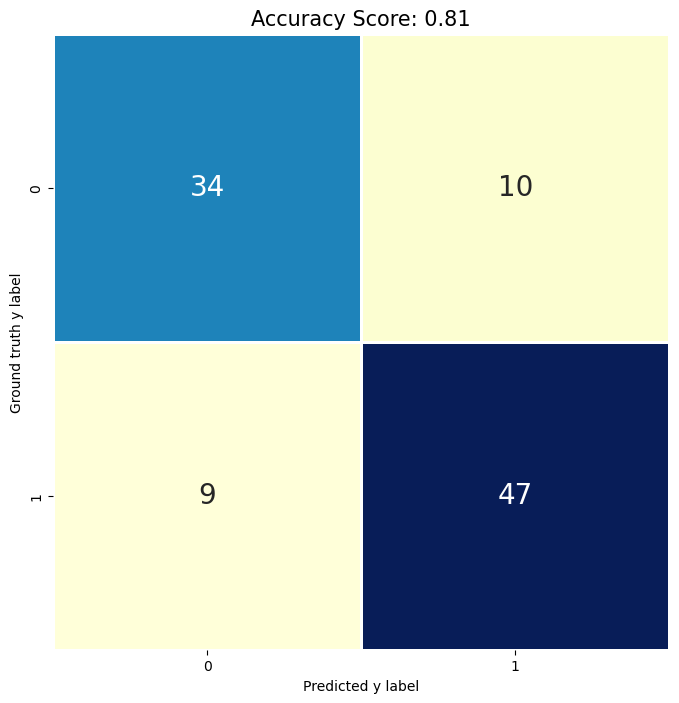

In [39]:
# Fancy it up! Use plt.savefig() to export
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True, fmt = ".0f", 
            cbar = False, linewidths = 2, 
            square = True, cmap = 'YlGnBu', annot_kws={"size": 20})
plt.ylabel('Ground truth y label')
plt.xlabel('Predicted y label')
all_sample_title = 'Accuracy Score: {0}'.format(test_score)
plt.title(all_sample_title, size = 15);

## Exercise - scikit learn's `LinearRegression()` function

1. Compare our "by hand" OLS results to those producd by sklearn's `LinearRegression` function. Are they the same? 
    * Slope = 4
    * Intercept = -4
    * RMSE = 2.82843
    * y_hat = y_hat = B0 + B1 * data.x

## Building text vocabularies

What about how text is predicted? If we have text as data, we also need to convert the _representation_ of text into a format that machine learning algorithms can understand. 

### Define a corpus 

In [40]:
corpus = [
    "First document text goes in this list of strings.",
    "Second document text goes here as well.",
    "Third document text text.",
    "Document four!"
    ]
corpus

['First document text goes in this list of strings.',
 'Second document text goes here as well.',
 'Third document text text.',
 'Document four!']

## Document encoding for machine learning

### Key terms

* **Document term matrix:** contains the frequencies (or TF-IDF scores) of vocabulary terms in a collection of documents in sparse format. 
    * Each row is a document in the corpus.
    * Each column represents a term (uni-gram, bi-gram, etc.) called a feature.    

![dtm](img/dtm.png)
[modified from "The Effects of Feature Scaling: From Bag-of-Words to Tf-Idf"](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/ch04.html)

* **Bag of words:** The simplest text analysis model that standardizes text in a document by removing punctuation, converting the words to lowercase, and counting the token frequencies.
    * Numeric values indicate that a particular feature is found in a document that number of times.
    * A 0 indicates that the feature is _not_ found in that document. 
    
* **TF-IDF:** Term frequency–inverse document frequency; a weighted numerical statistic that indicates the uniqueness of a word is in a given document or corpus (see Chapter 7).

    * For TF-IDF sparse matrices:
        * A value closer to 1 indicate that a feature is more relevant to a particular document.
        * A value closer to 0 indicates that that feature is less/not relevant to that document.

## Bag of words model with `CountVectorizer`

The bag of words model represents text ignoring syntactical elements like grammar and word order while only preserving the multiplicy/frequency of unique tokens. Typically, a bag of words model removes punctuation and casefolds the text to lowercase before counting the words (i.e. 'Apple' and 'apple' will both count toward instances of the word, 'apple'). 

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# create the bag of words
vectorizer = CountVectorizer()

# the .fit method will learn the vocabulary 
vectorizer.fit(corpus)

# Print the vocabulary
vectorizer.vocabulary_

{'first': 2,
 'document': 1,
 'text': 11,
 'goes': 4,
 'in': 6,
 'this': 13,
 'list': 7,
 'of': 8,
 'strings': 10,
 'second': 9,
 'here': 5,
 'as': 0,
 'well': 14,
 'third': 12,
 'four': 3}

In [42]:
# The `.transform` method will help us here!
# The first number is the document number
# The second number is the word from the vocabulary
# The third number is the number of times that word occurs
vector = vectorizer.transform(corpus)
print(vector) 

  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (0, 13)	1
  (1, 0)	1
  (1, 1)	1
  (1, 4)	1
  (1, 5)	1
  (1, 9)	1
  (1, 11)	1
  (1, 14)	1
  (2, 1)	1
  (2, 11)	2
  (2, 12)	1
  (3, 1)	1
  (3, 3)	1


### Present the sparse matrix

In [43]:
# each row is a document, each column is a word from the vocabulary! 
# 1 means that word is present in that particular document
print(vector.toarray())

[[0 1 1 0 1 0 1 1 1 0 1 1 0 1 0]
 [1 1 0 0 1 1 0 0 0 1 0 1 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 2 1 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]]


In [44]:
# get the column names (alphabetical sort)
vectorizer.get_feature_names()

/Users/evanmuzzall/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['as',
 'document',
 'first',
 'four',
 'goes',
 'here',
 'in',
 'list',
 'of',
 'second',
 'strings',
 'text',
 'third',
 'this',
 'well']

In [45]:
# What does this tell us? 
vectorizer.transform(['text']).toarray() 

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [46]:
# 'text' is present in our bag of words, and in the sparse matrix, occupies the twelfth column!

# What if we try to transform a token that isn't in our bag of words? 
vectorizer.transform(['abracadabra']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### N-grams

While we have focused on single words above, we can apply this approach to multi-word phrases in order to try to predict linguistic instances and potentially better understand context of a corpus of documents. 

Use the below token patterns: 
* bigrams    `ngram_range = (1, 2)`
* trigrams   `ngram_range = (1, 3)`
* etc.

In [47]:
 # token pattern is written using regular expressions (regex for short): 
 #      '\b' signifies the empty string ("") at the beginning or end of a word, 
 #      '\w' is any character, 
 #      '+' signifies that the regex can match one or more instances of the prior character (in this case, '\w')
 # question: what does '\b\w+\b' mean then? 
bigram_vectorizer = CountVectorizer(ngram_range = (1,2),
                                    token_pattern = r'\b\w+\b',
                                    min_df = 1)
bigram_vectorizer

CountVectorizer(ngram_range=(1, 2), token_pattern='\\b\\w+\\b')

Since we specify bigrams, both unigrams _and_ bigrams are returned!

In [48]:
from sklearn.feature_extraction import DictVectorizer
bigram_analyzer = bigram_vectorizer.build_analyzer()
bigram_analyzer('Welcome to Stanford Libraries!')

['welcome',
 'to',
 'stanford',
 'libraries',
 'welcome to',
 'to stanford',
 'stanford libraries']

### Apply n-grams to our above corpus

In [49]:
corpus

['First document text goes in this list of strings.',
 'Second document text goes here as well.',
 'Third document text text.',
 'Document four!']

In [50]:
# perform the transformation
x = bigram_vectorizer.fit_transform(corpus).toarray()
print(x)

[[0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0]
 [1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 0 0 0]
 [0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [51]:
# get the feature (column) names
# remember the rows are our four documents!
bigram_vectorizer.get_feature_names()

['as',
 'as well',
 'document',
 'document four',
 'document text',
 'first',
 'first document',
 'four',
 'goes',
 'goes here',
 'goes in',
 'here',
 'here as',
 'in',
 'in this',
 'list',
 'list of',
 'of',
 'of strings',
 'second',
 'second document',
 'strings',
 'text',
 'text goes',
 'text text',
 'third',
 'third document',
 'this',
 'this list',
 'well']

In [52]:
# search for vocabulary words across the documents
feature_index = bigram_vectorizer.vocabulary_.get('first document')
x[:, feature_index]

array([1, 0, 0, 0])

### Data frame vocabulary across documents

Our vocabulary for the `corpus` variable consists of 30 unigram and bigram **features** across the four documents.

In [53]:
# redefine x as sparse matrix (not array)
x = bigram_vectorizer.fit_transform(corpus)
print(x)

  (0, 5)	1
  (0, 2)	1
  (0, 22)	1
  (0, 8)	1
  (0, 13)	1
  (0, 27)	1
  (0, 15)	1
  (0, 17)	1
  (0, 21)	1
  (0, 6)	1
  (0, 4)	1
  (0, 23)	1
  (0, 10)	1
  (0, 14)	1
  (0, 28)	1
  (0, 16)	1
  (0, 18)	1
  (1, 2)	1
  (1, 22)	1
  (1, 8)	1
  (1, 4)	1
  (1, 23)	1
  (1, 19)	1
  (1, 11)	1
  (1, 0)	1
  (1, 29)	1
  (1, 20)	1
  (1, 9)	1
  (1, 12)	1
  (1, 1)	1
  (2, 2)	1
  (2, 22)	2
  (2, 4)	1
  (2, 25)	1
  (2, 26)	1
  (2, 24)	1
  (3, 2)	1
  (3, 7)	1
  (3, 3)	1


In [54]:
import scipy.sparse
corpus_df = pd.DataFrame(x.todense(), columns = bigram_vectorizer.get_feature_names())
corpus_df

,as,as well,document,document four,document text,first,first document,four,goes,goes here,...,second document,strings,text,text goes,text text,third,third document,this,this list,well
0,0,0,1,0,1,1,1,0,1,0,...,0,1,1,1,0,0,0,1,1,0
1,1,1,1,0,1,0,0,0,1,1,...,1,0,1,1,0,0,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,...,0,0,2,0,1,1,1,0,0,0
3,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# The features (columns) are the vocabulary from the bigram version of our corpus variable above! 
corpus_df.columns

Index(['as', 'as well', 'document', 'document four', 'document text', 'first',
       'first document', 'four', 'goes', 'goes here', 'goes in', 'here',
       'here as', 'in', 'in this', 'list', 'list of', 'of', 'of strings',
       'second', 'second document', 'strings', 'text', 'text goes',
       'text text', 'third', 'third document', 'this', 'this list', 'well'],
      dtype='object')

## Exercise - document term matrices

1. Identify a document or corpus of your own to apply these steps to. 

## What does this mean for predicting text?

Read on in Chapter 7 "English text preprocessing basics" to learn about using this type of approach for predicting text. 